In [1]:
# Libraries for managing dataset
import pandas as pd
import numpy as np

# The defaultdict of collections library
from collections import defaultdict as dd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries of the ML models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.svm import LinearSVC as LSVM
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import CategoricalNB as NBC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.neural_network import MLPClassifier as MLPC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression as LR

# libraries for performance evaluation
from sklearn.metrics import zero_one_loss
from sklearn.metrics import jaccard_score # equal to accuracy_score for binary classification
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import hamming_loss
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import recall_score
from sklearn.metrics import recall_score, make_scorer

# Libraries for cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold


df = pd.read_csv("../datasets/final_combined_extracted_features_dataset/final_combined_extracted_octapeptide_features.csv", 
                 index_col=0)


training_set, validation_set, testing_set = np.split(df.sample(frac=1, random_state=123), [int(.7*len(df)), int(.8*len(df))])

X_training = training_set.drop(["cleavage Status"], axis=1)
y_training = training_set["cleavage Status"].copy().map({"cleaved": 1, "uncleaved": 0})

X_validation = validation_set.drop(["cleavage Status"], axis=1)
y_validation = validation_set["cleavage Status"].copy().map({"cleaved": 1, "uncleaved": 0})

X_testing = testing_set.drop(["cleavage Status"], axis=1)
y_testing = testing_set["cleavage Status"].copy().map({"cleaved": 1, "uncleaved": 0})

In [2]:
## Instantiating the classifier classes and storing in a list
clf_list = [
    (LSVM(random_state=0, tol=1e-5, C=5), "LinearSVC"),
    (LDA(solver="svd", tol=1e-8), "LinearDiscriminantAnalysis"),
    (GBC(n_estimators=800, learning_rate=1.0, max_depth=1, random_state=0, 
         tol=1e-10, ccp_alpha=0.0), "GradientBoostingClassifier"),
    (KNN(n_neighbors=4, n_jobs=-1, metric="minkowski", leaf_size=30, p=2, 
         weights="distance"), "KNeighorsClassifier"),
    (NBC(alpha=0), "CategoricalNB"),
    (DTC(criterion="gini", splitter="best", max_depth=None, ccp_alpha=0.0), "DecisionTreeClassifier"),
    (MLPC(hidden_layer_sizes=100, activation ="relu", solver="adam", alpha=0.0001, 
          learning_rate="adaptive", max_iter=200, tol=1e-4, momentum=0.9, epsilon=1e-8,), "MLPClassifier"),
    (Perceptron(penalty="l2", alpha=0.0000001, max_iter=4000, tol=1e-7, eta0=2, n_jobs=-1), "Perceptron"),       
    (LR(random_state=0, penalty="l2", tol=1e-3, C=0.99, solver="lbfgs", max_iter=150,
       n_jobs=-1), "LogisticRegression")]

scores = dd(list)

for clf, name in clf_list:
    clf.fit(X_training, y_training)
    y_pred = clf.predict(X_testing)
    scores["Classifier"].append(name)   

    for metric in [balanced_accuracy_score]:
        score_name = metric.__name__.replace("_", " ").replace("score", " ").capitalize()
        scores[score_name].append(metric(y_testing, y_pred))

    for metric in [precision_score, recall_score, f1_score, roc_auc_score, jaccard_score]:
        score_name = metric.__name__.replace("_", " ").replace("score", " ").capitalize()
        scores[score_name].append(metric(y_testing, y_pred, average="macro"))       

C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


C:\Users\USER\AppData\Local\Temp/ipykernel_17140/109611648.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


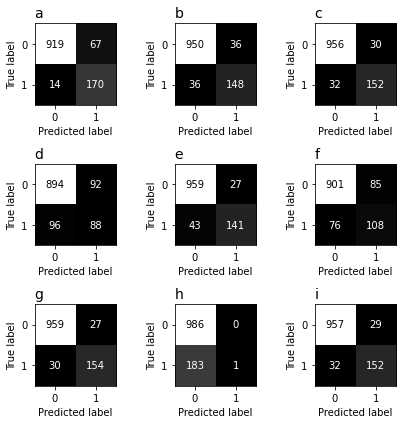

In [3]:
titles = ["a", "b", "c", "d", "e", "f", "g", "h", "i"]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(6, 6))

for (clf, name), ax, title in zip(clf_list, axes.flatten(), titles):
    ConfusionMatrixDisplay.from_estimator(clf, X_testing, y_testing, ax=ax, cmap='Greys_r', colorbar=False)
    ax.set_title(label=title, loc="left", fontsize=14,)
    #ax.set_title(label=name, loc="left", fontsize=18) we can use this if we want the titles to show as name of the classifiers
    ax.grid(False)
#     ax.set(xlabel=None)
#     ax.set(ylabel=None)

# fig.supxlabel("Predicted Label\n\n a) Linear Support Vector Machine; b) Linear Discriminant analysis;\n c) Gradient Boosting Classifier; d) K-Nearest Neighbors;\n e) Naive Bayes Classifier; f) Decision Tree Classifier; g) Multi-Layer\n Perceptron Classifier; h) Perceptron Classifier; i) Logistic Regression", 
#               fontsize=20, fontweight="bold")  
# fig.supylabel("True Label", fontsize=20, fontweight="bold")    
fig.tight_layout() 
#fig.savefig('../results/Combined_Confusion_Matrix_of_Models_on_Evaluation_Set.jng', dpi=1200)
fig.savefig('../results/Confusion_Matrix_of_the_Models_on_Testing_Set.png', dpi=1200)
fig.show()